# Pandas I

Alberto Quaini

## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Problem 1

In [25]:
indeces = np.arange(0, 51, 2)
contents = index**2 - 1
series = pd.Series(contents, index = indeces)
index_3 = (series.index % 3) == 0
series[index_3] = 0
    
print(series)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


## Problem 2

In [50]:
def cum_random_walk(p, d = 100):
    dates = pd.date_range(start = '2000-01-01', end = '2000-12-31')
    n = len(dates)
    changes = np.random.binomial(1, p, size = n)
    changes[changes == 0] = -1
    
    ran_walk = pd.Series(changes, index = dates)
    ran_walk[0] = d
    cum_ran_walk = ran_walk.cumsum()
    cum_ran_walk[ cum_ran_walk < 0 ] = 0
    cum_ran_walk.plot()

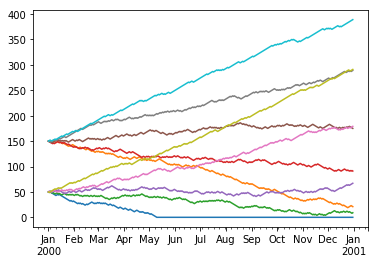

In [53]:
probs = np.linspace(.3, .8, 5)
ds = np.linspace(50, 150, 2)
for p in probs:
    for d in ds:
        cum_random_walk(p, d)

## Problem 3

In [4]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 
        'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 
                            'Sex': sex, 'Age': age,'Class': rank})

In [5]:
studentInfo[(studentInfo.Age > 19) & (studentInfo.Sex == 'M')][['ID', 'Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

In [8]:
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})

In [9]:
studentInfo.merge(otherInfo, on = 'ID')[studentInfo['Sex'] == 'M'][['ID', 'Age','GPA']]

,ID,Age,GPA
0,0,20,3.8
2,2,18,3.0
4,4,19,2.8
6,6,20,3.8
7,7,19,3.4


## Problem 5

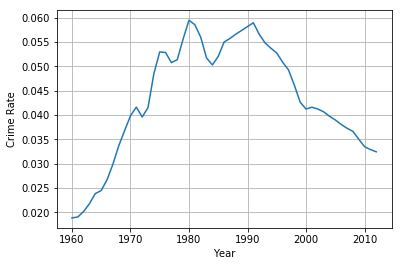

,Population,Total,Violent,Property,Murder,Forcible-Rape,Robbery,Aggravated-assault,Burglary,Larcency-Theft,Vehicle-Theft,Rate
Year,,,,,,,,,,,,
1980,225349264,13408300,1344520,12063700,23040,82990,565840,672650,3795200,7136900,1131700,0.059500
1991,252177000,14872900,1911770,12961100,24700,106590,687730,1092740,3157200,8142200,1661700,0.058978
1981,229146000,13423800,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800,0.058582
1990,248709873,14475600,1820130,12655500,23440,102560,639270,1054860,3073900,7945700,1635900,0.058203
1989,248239000,14251400,1646040,12605400,21500,94500,578330,951710,3168200,7872400,1564800,0.057410


In [10]:
data = pd.read_csv('crime_data.txt', skiprows = 1, index_col = 0)
data
data['Rate'] = data.Total / data.Population

plt.plot(data.index, data.Rate)
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

data.sort_values(by = ['Rate'], ascending = False)[:5]

In [11]:
means = data[(data.index >= 1960) & (data.index <= 2012)][['Total', 'Burglary']].mean()
means

Total       1.063807e+07
Burglary    2.446286e+06
dtype: float64

In [12]:
data[(data['Total'] < means['Total']) & (data['Burglary'] > means['Burglary'])].index

Int64Index([1973, 1974], dtype='int64', name='Year')

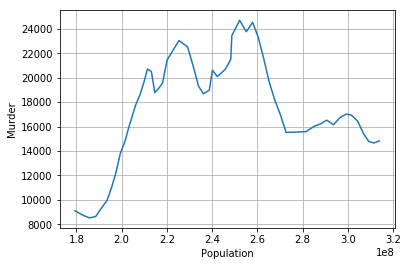

In [13]:
plt.plot(data['Population'], data['Murder'])
plt.grid(True)
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

In [14]:
data80 = data[(1979 < data.index) & (data.index < 1991)][['Population', 'Violent', 'Robbery']]
data80.to_csv('crime_subset.csv')

## Problem 6

In [16]:
titanic = pd.read_csv('titanic.csv')
titanic = titanic.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1)
titanic.dropna(subset=['Survived'], inplace=True)
titanic.Survived.replace({1: True, 0: False}, inplace=True)
titanic.Age.fillna(titanic.Age.mean())
titanic.to_csv('titanic_clean.csv')

Number survived

In [19]:
titanic.Survived.sum()

500

Percentage survived

In [22]:
round(titanic.Survived.sum() / len(titanic) * 100, 4)

38.1971

Average price per ticket

In [24]:
round(titanic.Fare.mean(), 4)

33.2955

Most expensive ticket

In [25]:
titanic.Fare.max()

512.3292

Oldest survivor

In [26]:
titanic[titanic.Survived].Age.max()

80.0

Youngest survivor

In [27]:
titanic[titanic.Survived].Age.min()

0.1667

Oldest non-survivor

In [28]:
titanic[titanic.Survived == False].Age.max()

74.0

Youngest non-survivor

In [29]:
titanic[titanic.Survived == False].Age.min()

0.3333